# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r'C:\Users\felip\OneDrive\Ebac\Descritiva 1\Avaliativa 1\Profissão Cientista de Dados M6 Pratique 1\Profissão Cientista de Dados M6 - SINASC_RO_2019.csv')

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [29]:

df.loc[(df["APGAR5"] >= 0) & (df["APGAR5"] <= 3), "APGAR5_categ"] = "asfixia grave"
df.loc[(df["APGAR5"] >= 4) & (df["APGAR5"] <= 5), "APGAR5_categ"] = "asfixia moderada"
df.loc[(df["APGAR5"] >= 6) & (df["APGAR5"] <= 7), "APGAR5_categ"] = "asfixia leve"
df.loc[(df["APGAR5"] >= 8) & (df["APGAR5"] <= 10), "APGAR5_categ"] = "normal"

df.head(3)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_categ
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

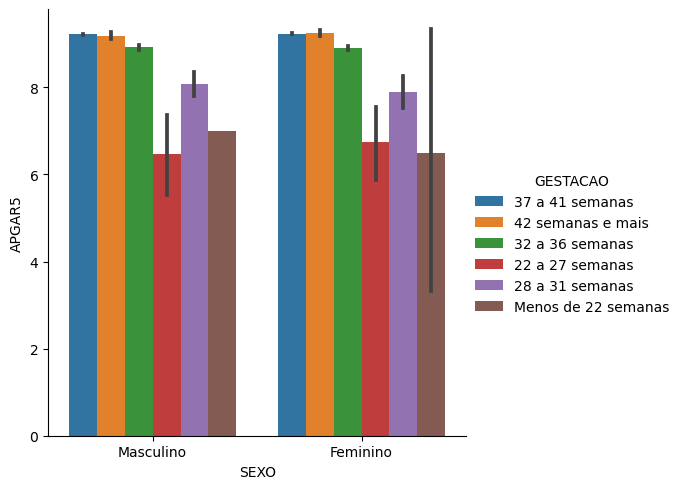

In [30]:
df.columns

sns.catplot(x='SEXO'
            , y='APGAR5'
            ,hue = 'GESTACAO'
            , kind='bar'
            , data=df
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [31]:
df_limpo = df[df['APGAR5_categ'].notna()]

freq = pd.crosstab(df_limpo['APGAR5_categ'], df_limpo['GESTACAO'])

freq

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5_categ,,,,,,
asfixia grave,21,3,8,33,1,2
asfixia leve,12,18,73,196,6,1
asfixia moderada,1,12,19,28,1,0
nan,1,3,15,66,2,0
normal,51,129,2134,22266,690,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [32]:
APGAR5_gest = freq.div(freq.sum(axis = 1), axis = 0)
APGAR5_gest

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5_categ,,,,,,
asfixia grave,0.308824,0.044118,0.117647,0.485294,0.014706,0.029412
asfixia leve,0.039216,0.058824,0.238562,0.640523,0.019608,0.003268
asfixia moderada,0.016393,0.196721,0.311475,0.459016,0.016393,0.000000
nan,0.011494,0.034483,0.172414,0.758621,0.022989,0.000000
normal,0.002018,0.005104,0.084435,0.880984,0.027301,0.000158


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

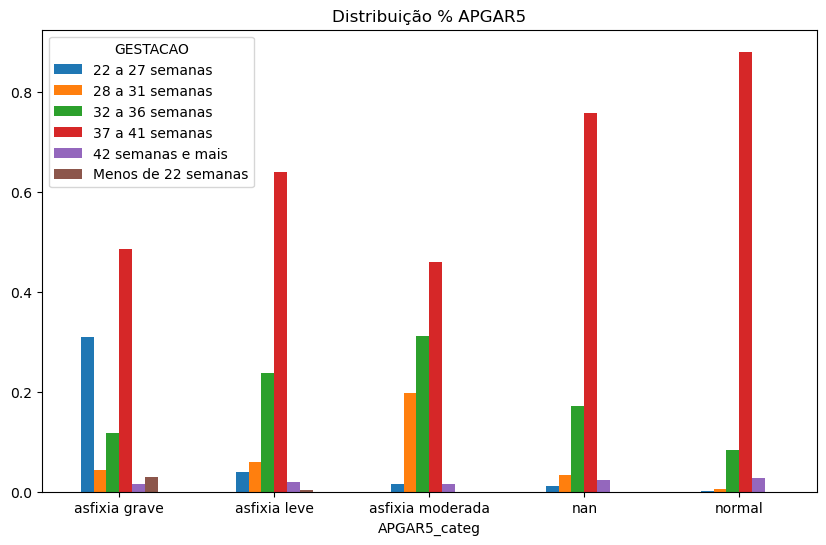

In [42]:

APGAR5_gest.plot.bar(figsize=(10,6))
plt.title("Distribuição % APGAR5")
plt.xticks(rotation=0)
plt.show()


#Minha conclusão: Na asfixia grave temos um volume consideravel de acontecimentos nas gestações de 22 a 27 semanas


### Minha conclusão: Na asfixia grave temos um volume consideravel de acontecimentos nas gestações de 22 a 27 semanas

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'asfixia leve'),
  Text(2, 0, 'asfixia grave'),
  Text(3, 0, 'asfixia moderada'),
  Text(4, 0, 'nan')])

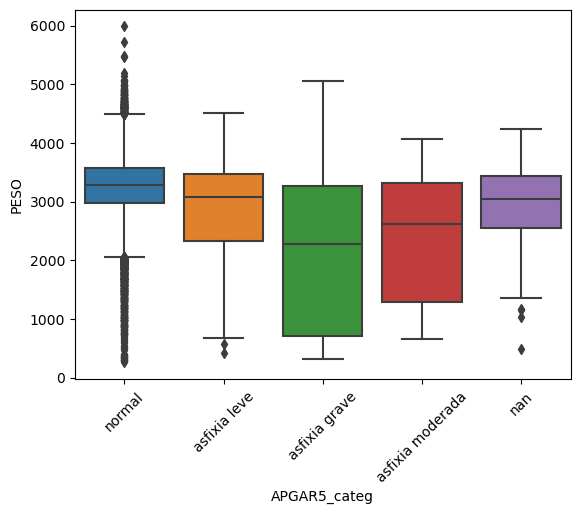

In [58]:
#APGAR5_categ
ax = sns.boxplot(data=df, y="PESO", x="APGAR5_categ", orient="v")
plt.xticks(rotation=45)



### Bebes com um APGAR5 normal, tendem a ter uma mediana mais elevada no peso, e os casos com asfixia grave nós temos uma mediana menor